<a href="https://colab.research.google.com/github/snigdha6106/FMML_Projects_and_Labs/blob/main/IMDB_Sentiment_Analysis_using_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 255s 643ms/step - accuracy: 0.5086 - loss: 0.6934 - val_accuracy: 0.5854 - val_loss: 0.6667
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 266s 654ms/step - accuracy: 0.5843 - loss: 0.6683 - val_accuracy: 0.5796 - val_loss: 0.6562
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 223s 571ms/step - accuracy: 0.6181 - loss: 0.6091 - val_accuracy: 0.6898 - val_loss: 0.6257
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 288s 639ms/step - accuracy: 0.7611 - loss: 0.5165 - val_accuracy: 0.7462 - val_loss: 0.5414
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 268s 656ms/step - accuracy: 0.8270 - loss: 0.4215 - val_accuracy: 0.8299 - val_loss: 0.3943


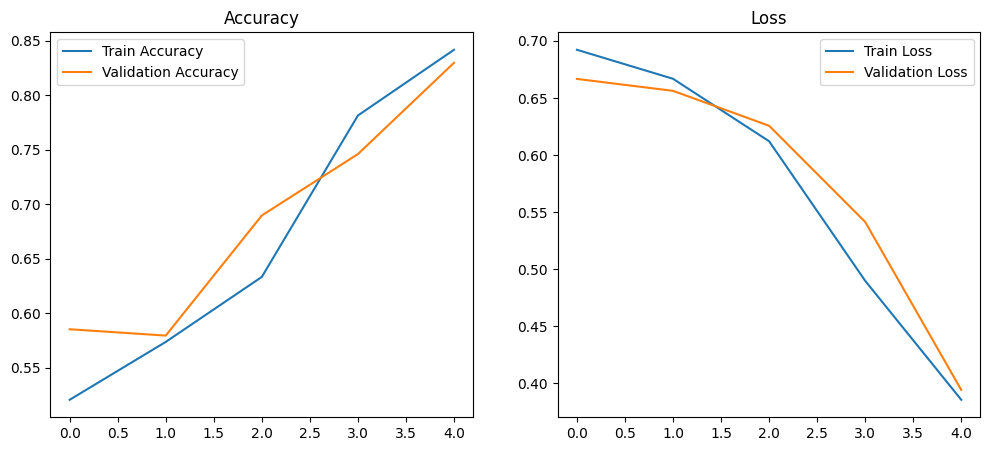

782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.8268 - loss: 0.3943
Test Loss: 0.3943
Test Accuracy: 0.8299


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.datasets import imdb

vocab_size = 10000
max_length = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
